Importing necessary libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

Enabling tqdm for pandas to show progress bars in pandas operations

In [3]:
tqdm.pandas()

Loading the data from a CSV file

In [4]:
df = pd.read_csv(r'C:\Users\hp\Downloads\traces_data.csv', index_col=False , header=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_500\1648944038.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(r'C:\Users\hp\Downloads\traces_data.csv', index_col=False , header=0)


Displaying the first few rows of the dataframe to get an overview of the data

In [5]:
print("First few rows of the dataframe:")
df.head()

First few rows of the dataframe:


,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,2023-11-23 04:42:33.930086000,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,2023-11-23 04:42:36.928455000,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,2023-11-23 04:42:39.923633000,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


Displaying basic information about the dataframe, such as column names, non-null counts and data types

In [24]:
print("\nBasic information about the dataframe:")
df.info()


Basic information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Timestamp     183615 non-null  datetime64[ns]
 1   traceID       183615 non-null  object        
 2   spanID        183615 non-null  object        
 3   parentSpanID  141834 non-null  object        
 4   serviceName   183615 non-null  object        
 5   Name          183615 non-null  object        
 6   durationNano  183615 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 9.8+ MB


Converting the 'Timestamp' column to datetime format for time-series analysis

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

Converting the 'durationNano' column to numeric, forcing errors to NaN

In [8]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df['durationNano'] = pd.to_numeric(df['durationNano'], errors='coerce')

Displaying basic information about the dataframe, such as column names, non-null counts and data types after converting 

In [25]:
print("\nBasic information about the dataframe after conversion:")
df.info()


Basic information about the dataframe after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Timestamp     183615 non-null  datetime64[ns]
 1   traceID       183615 non-null  object        
 2   spanID        183615 non-null  object        
 3   parentSpanID  141834 non-null  object        
 4   serviceName   183615 non-null  object        
 5   Name          183615 non-null  object        
 6   durationNano  183615 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 9.8+ MB


Displaying summary statistics of the dataframe to understand the data distribution and identify potential issues

In [26]:
print("\nSummary statistics of the dataframe:")
df.describe()


Summary statistics of the dataframe:


,Timestamp,durationNano
count,183615,1.836150e+05
mean,2023-11-23 03:28:13.200504576,5.414918e+06
min,2023-11-23 02:34:48.848999936,0.000000e+00
25%,2023-11-23 03:00:04.527859200,3.357000e+05
50%,2023-11-23 03:27:33.628999936,1.584906e+06
75%,2023-11-23 03:55:31.771000064,6.832718e+06
max,2023-11-23 04:59:36.766831067,4.999858e+09
std,NaN,2.077879e+07


Plotting the distribution of 'durationNano' to visualize its frequency distribution

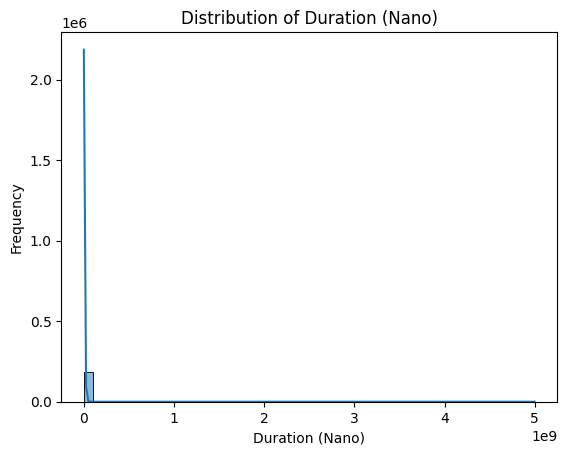

In [11]:
plt.figure(facecolor='white')
sns.histplot(df['durationNano'].dropna(), bins=50, kde=True)
plt.title('Distribution of Duration (Nano)')
plt.xlabel('Duration (Nano)')
plt.ylabel('Frequency')
plt.show()

Grouping the data by 'serviceName' and 'Name' to find the average duration for each combination

In [14]:
service_duration = df.groupby(['serviceName', 'Name'])['durationNano'].mean().reset_index()

Displaying the first few rows of the grouped data to verify the grouping and averaging

In [27]:
print("\nAverage duration by service and method name:")
service_duration.head(15)


Average duration by service and method name:


,serviceName,Name,durationNano
0,accountingservice,orders receive,2.234955e+04
1,adservice,getAdsByCategory,3.287133e+04
2,adservice,getRandomAds,1.041713e+05
3,adservice,oteldemo.AdService/GetAds,2.148302e+06
4,adservice,oteldemo.FeatureFlagService/GetFlag,8.187715e+06
5,cartservice,EXPIRE,3.046895e+05
6,cartservice,HGET,5.249169e+05
7,cartservice,HMSET,3.795042e+05
8,cartservice,oteldemo.CartService/AddItem,1.708592e+06
9,cartservice,oteldemo.CartService/EmptyCart,5.974059e+05


Plotting the average duration by service to identify which services have longer average durations

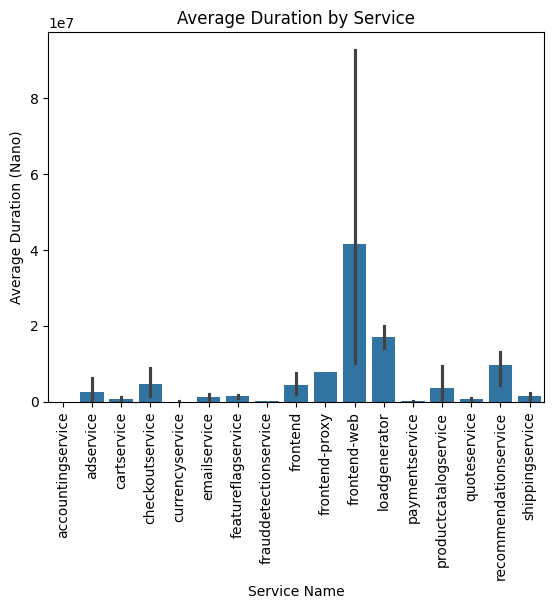

In [16]:
plt.figure(facecolor='white')
sns.barplot(data=service_duration, x='serviceName', y='durationNano')
plt.title('Average Duration by Service')
plt.xlabel('Service Name')
plt.ylabel('Average Duration (Nano)')
plt.xticks(rotation=90)
plt.show()

Plotting the average duration by method name to identify which methods have longer average durations

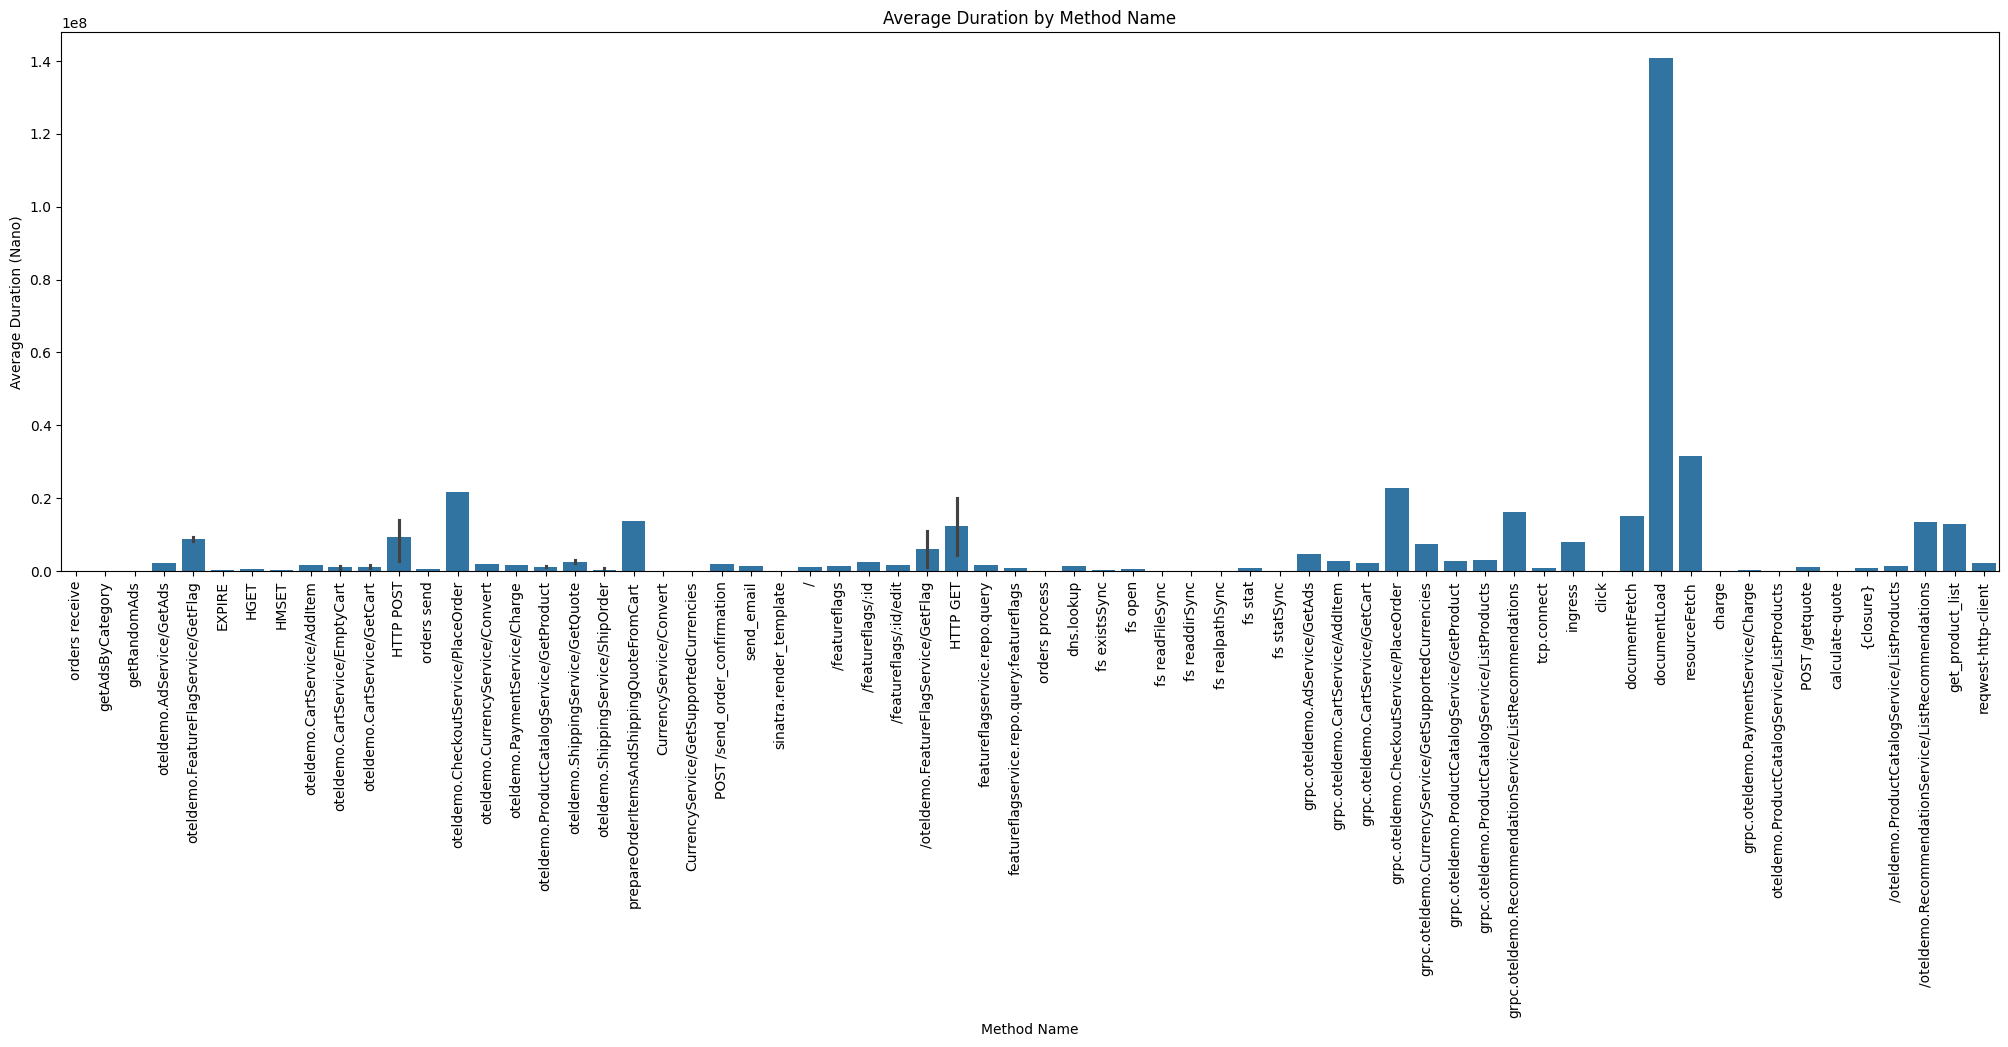

In [19]:
plt.figure(figsize=(25,7), facecolor='white')
sns.barplot(data=service_duration, x='Name', y='durationNano')
plt.title('Average Duration by Method Name')
plt.xlabel('Method Name')
plt.ylabel('Average Duration (Nano)')
plt.xticks(rotation=90)
plt.show()

Identifying spans that have parent spans, filtering for rows where 'parentSpanID' is not null

In [20]:
parent_spans = df[df['parentSpanID'].notnull()]

Displaying the first few rows of spans with parent spans to verify the filtering

In [22]:
print("\nSpans with parent spans:")
parent_spans.head()


Spans with parent spans:


,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
1,2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
13,2023-11-23 04:43:02.849966385,ddecc69963a93a81748ac538f34d5f48,4eb2530f781f9174,63f4a48ba5e06cfc,featureflagservice,featureflagservice.repo.query:featureflags,471430
26,2023-11-23 04:43:32.960630859,a860bb63ebeb1b81d9bfa3f82bfa098d,dbd60b14c44be891,a9b4e75286a4a5fc,featureflagservice,featureflagservice.repo.query:featureflags,799845
38,2023-11-23 04:44:03.080633112,28a6a47197ad19dad238f65bcd470027,2c77b96f69e5689b,f166397807ed7d8b,featureflagservice,featureflagservice.repo.query:featureflags,394203
51,2023-11-23 04:44:33.221592429,c3c886bd72cc247abc69f0c42b8ac0b7,65c154148aebff1f,fb87cf361a0422ba,featureflagservice,featureflagservice.repo.query:featureflags,414900
